In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [3]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})
df

,beta,exponential,normal_p,normal_l
0,48.276227,0.575669,11.379723,16.756990
1,54.695798,18.495513,12.765552,3.520414
2,59.409247,4.083384,12.376697,0.516712
3,43.103918,0.963393,8.387739,16.181141
4,59.835635,0.423673,9.732071,31.003782
...,...,...,...,...
995,32.195641,4.139477,8.757964,0.872110
996,40.101995,4.265604,11.442816,10.171672
997,53.852828,33.102976,15.621164,15.317722
998,58.428778,9.120536,7.730190,17.013474


In [4]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

<Axes: ylabel='Density'>

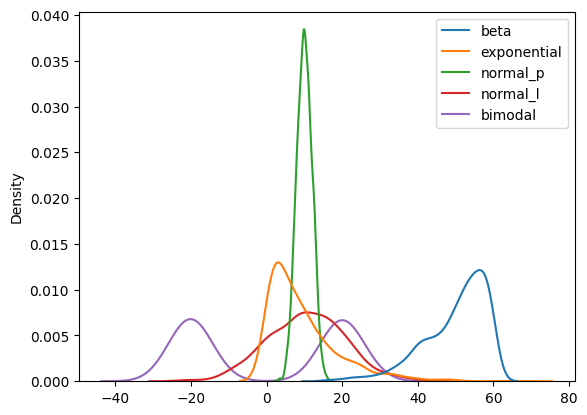

In [5]:
sns.kdeplot(data=df)

<Axes: ylabel='Density'>

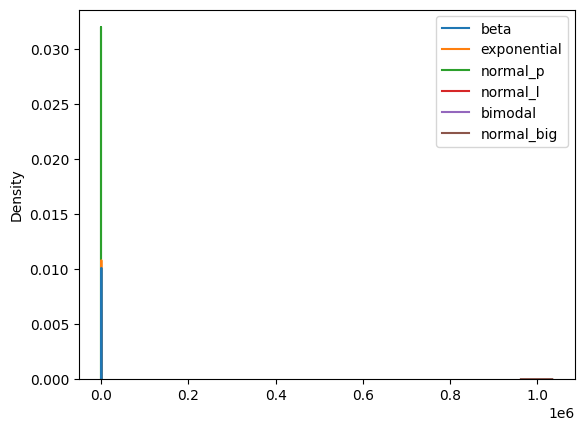

In [6]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<Axes: >

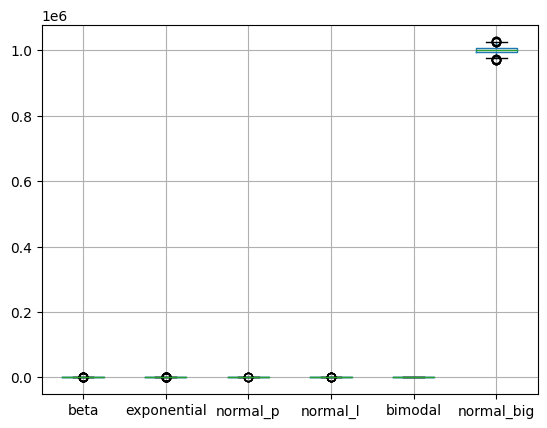

In [7]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [8]:
# Khai báo đối tượng MinMaxScaler
scaler = RobustScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)
df_s 

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.356580,-0.592675,0.498602,0.425508,0.575559,-0.831617
1,0.215273,1.093820,1.007046,-0.507576,0.565986,-0.683086
2,0.635145,-0.262553,0.864380,-0.719316,0.658814,1.439727
3,-0.817328,-0.556185,-0.599121,0.384915,0.460417,-1.188507
4,0.673128,-0.606980,-0.105902,1.429805,0.460877,-0.262190
...,...,...,...,...,...,...
995,-1.789033,-0.257273,-0.463290,-0.694263,-0.395193,0.367241
996,-1.084738,-0.245403,0.521750,-0.038710,-0.481974,-0.489341
997,0.140182,2.468577,2.054736,0.324050,-0.500586,-0.611723
998,0.547806,0.211510,-0.840368,0.443588,-0.576053,0.078303


<Axes: ylabel='Density'>

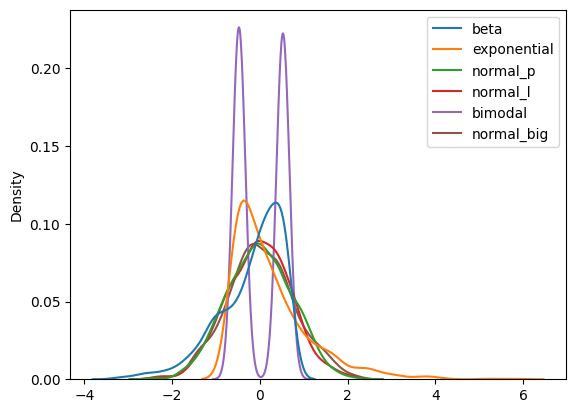

In [11]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [12]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,-0.199282,0.253088,-5.489612e-03,-1.306336e-02,0.027009,2.717993e-02
std,0.742340,0.881899,7.353139e-01,7.230812e-01,0.507441,7.686842e-01
min,-3.252387,-0.646481,-2.419971e+00,-2.402055e+00,-0.682791,-2.342623e+00
25%,-0.624459,-0.394718,-5.152589e-01,-5.283397e-01,-0.474165,-4.726874e-01
50%,0.000000,0.000000,3.258028e-16,6.261268e-17,0.000000,-4.635181e-15
75%,0.375541,0.605282,4.847411e-01,4.716603e-01,0.525835,5.273126e-01
max,0.687132,5.801848,2.236030e+00,2.146517e+00,0.800671,2.222282e+00


<Axes: >

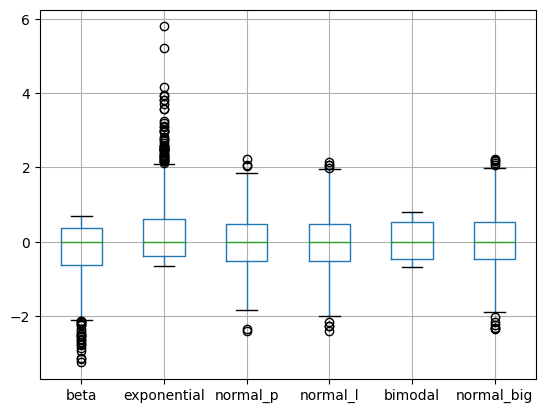

In [13]:
df_s.boxplot()

In [14]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.2523869502635243,
 -0.6464814463493201,
 -2.419971465150704,
 -2.402055380721366,
 -0.6827912868198007,
 -2.342623453510862]

In [15]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.6871318422501509,
 5.801848495135787,
 2.236029793004658,
 2.1465172559539365,
 0.800671271200959,
 2.222282160318234]

In [16]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([ 5.22791621e+01,  6.87313432e+00,  1.00207193e+01,  1.07208040e+01,
       -1.10364027e+00,  9.99651728e+05])